In [1]:
!pip install patchify
from pathlib import Path
from patchify import patchify
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
directory = Path('/content/drive/MyDrive/kaggle dataset/Semantic segmentation dataset')
scaler = MinMaxScaler()
patch_size = 256
image_dataset = []

for path in directory.glob('**/images'):
    images = sorted(path.glob('*.jpg'))
    print(f'Found images in: {path.name}')
    print([img.name for img in images])

    for image_path in images:
        image = cv2.imread(str(image_path), cv2.IMREAD_COLOR)

        if image is None:
            print(f'Error loading image: {image_path}')
            continue

        x_size = (image.shape[1] // patch_size) * patch_size
        y_size = (image.shape[0] // patch_size) * patch_size
        image = Image.fromarray(image).crop((0, 0, x_size, y_size))
        image = np.array(image)


        patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)

        for i in range(patches_img.shape[0]):
            for j in range(patches_img.shape[1]):
                single_patch_img = patches_img[i, j, :, :]
                single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)

                single_patch_img = single_patch_img[0]
                image_dataset.append(single_patch_img)


Found images in: images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
Found images in: images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
Found images in: images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
Found images in: images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
Found images in: images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.j

In [4]:

patch_size = 256
mask_dataset = []

for path in directory.glob('**/masks'):
    masks = sorted(path.glob('*.png'))
    print(f'Found masks in: {path.name}')
    print([mask.name for mask in masks])

    for mask_path in masks:
        mask = cv2.imread(str(mask_path), cv2.IMREAD_COLOR)

        if mask is None:
            print(f'Error loading mask: {mask_path}')
            continue

        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        x_size = (mask.shape[1] // patch_size) * patch_size
        y_size = (mask.shape[0] // patch_size) * patch_size
        mask = Image.fromarray(mask).crop((0, 0, x_size, y_size))
        mask = np.array(mask)


        patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)


        for row in range(patches_mask.shape[0]):
            for col in range(patches_mask.shape[1]):
                single_patch_mask = patches_mask[row, col, :, :]

                single_patch_mask = single_patch_mask[0]
                mask_dataset.append(single_patch_mask)


Found masks in: masks
['image_part_001.png', 'image_part_002.png', 'image_part_003.png', 'image_part_004.png', 'image_part_005.png', 'image_part_006.png', 'image_part_007.png', 'image_part_008.png', 'image_part_009.png']
Found masks in: masks
['image_part_001.png', 'image_part_002.png', 'image_part_003.png', 'image_part_004.png', 'image_part_005.png', 'image_part_006.png', 'image_part_007.png', 'image_part_008.png', 'image_part_009.png']
Found masks in: masks
['image_part_001.png', 'image_part_002.png', 'image_part_003.png', 'image_part_004.png', 'image_part_005.png', 'image_part_006.png', 'image_part_007.png', 'image_part_008.png', 'image_part_009.png']
Found masks in: masks
['image_part_001.png', 'image_part_002.png', 'image_part_003.png', 'image_part_004.png', 'image_part_005.png', 'image_part_006.png', 'image_part_007.png', 'image_part_008.png', 'image_part_009.png']
Found masks in: masks
['image_part_001.png', 'image_part_002.png', 'image_part_003.png', 'image_part_004.png', 'imag

In [5]:
image_dataset = np.array(image_dataset)
image_dataset = scaler.fit_transform(image_dataset.reshape(-1, 1)).reshape(image_dataset.shape)

mask_dataset = np.array(mask_dataset)

print(image_dataset.shape, mask_dataset.shape)

(1305, 256, 256, 3) (1305, 256, 256, 3)


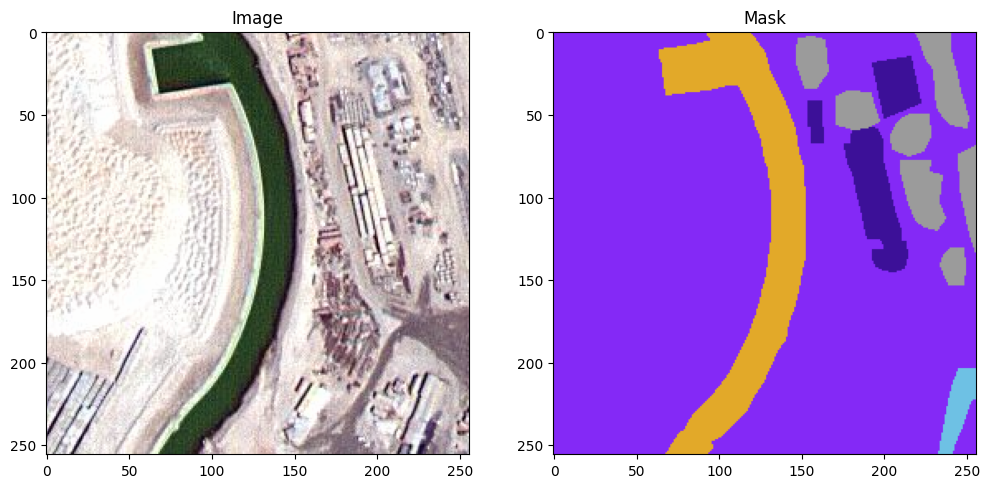

In [6]:

check_number = np.random.randint(0, len(image_dataset))
fig = plt.figure(figsize=(12, 10))
ax = fig.subplot_mosaic("""AB""")
ax['A'].imshow(image_dataset[0])
ax['A'].set_title('Image')
ax['B'].imshow(mask_dataset[0])
ax['B'].set_title('Mask')
plt.show()


In [7]:
class_colors_hex = {
    'Building': '#3C1098',
    'Land': '#8429F6',
    'Road': '#6EC1E4',
    'Vegetation': '#FEDD3A',
    'Water': '#E2A929',
    'Unlabeled': '#9B9B9B'
}

def hex_to_int(hex_color):
    hex_color = hex_color.lstrip('#')
    return np.array(tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4)))
class_colors = {key: hex_to_int(value) for key, value in class_colors_hex.items()}

print(class_colors)


{'Building': array([ 60,  16, 152]), 'Land': array([132,  41, 246]), 'Road': array([110, 193, 228]), 'Vegetation': array([254, 221,  58]), 'Water': array([226, 169,  41]), 'Unlabeled': array([155, 155, 155])}


In [8]:
def rgb_to_2D_label(label):
    """
    Convert RGB mask to integer labels based on predefined class colors.

    Args:
        label (np.ndarray): Input mask in RGB format.

    Returns:
        np.ndarray: Segmentation mask with integer labels.
    """
    label_seg = np.zeros(label.shape[:-1], dtype=np.uint8)


    for idx, color in enumerate(class_colors.values()):
        label_seg[np.all(label == color, axis=-1)] = idx

    return label_seg

labels = np.array([rgb_to_2D_label(mask) for mask in mask_dataset])
labels = np.expand_dims(labels, axis=3)

print("Unique labels in label dataset are: ", np.unique(labels))
print("Shape of the labels is: ", labels.shape)


Unique labels in label dataset are:  [0 1 2 3 4 5]
Shape of the labels is:  (1305, 256, 256, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical


num_classes = len(class_colors)
labels_categ = to_categorical(labels, num_classes=num_classes)

print("Shape of one-hot encoded labels:", labels_categ.shape)

Shape of one-hot encoded labels: (1305, 256, 256, 6)


In [ ]:
# Splitting the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_categ, test_size=0.20, random_state=42)

# Further splitting the test data into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print(f'Shape of training data: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Shape of validation data: X_val: {X_val.shape}, y_val: {y_val.shape}')
print(f'Shape of test data: X_test: {X_test.shape}, y_test: {y_test.shape}')

Shape of training data: X_train: (1044, 256, 256, 3), y_train: (1044, 256, 256, 6)
Shape of validation data: X_val: (130, 256, 256, 3), y_val: (130, 256, 256, 6)
Shape of test data: X_test: (131, 256, 256, 3), y_test: (131, 256, 256, 6)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen_args = dict(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)
seed = 42

def create_generator(image_generator, mask_generator, X, y, batch_size, seed):
    """
    Creates a generator for images and masks with consistent augmentation.

    Parameters:
    - image_generator: ImageDataGenerator for images.
    - mask_generator: ImageDataGenerator for masks.
    - X: Input images.
    - y: Masks.
    - batch_size: Batch size.
    - seed: Random seed for reproducibility.

    Returns:
    - A generator yielding tuples of (images, masks).
    """
    image_generator = image_generator.flow(X, batch_size=batch_size, seed=seed)
    mask_generator = mask_generator.flow(y, batch_size=batch_size, seed=seed)

    while True:
        X_batch = next(image_generator)
        y_batch = next(mask_generator)
        yield X_batch, y_batch

train_generator = create_generator(image_datagen, mask_datagen, X_train, y_train, batch_size=32, seed=seed)
val_datagen = ImageDataGenerator()
val_generator = create_generator(val_datagen, val_datagen, X_val, y_val, batch_size=32, seed=seed)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D, Conv2DTranspose, concatenate, Multiply, Add, GlobalAveragePooling2D, Reshape, Activation
from tensorflow.keras.models import Model

def attention_gate(F_g, F_l, inter_channels):
    """
    Attention Gate mechanism.

    Parameters:
    - F_g: Gating signal from the decoder.
    - F_l: Feature map from the encoder.
    - inter_channels: Intermediate number of channels.

    Returns:
    - Attention-weighted feature map.
    """

    W_g = Conv2D(inter_channels, kernel_size=1, strides=1, padding='same', kernel_initializer='he_normal')(F_g)
    W_g = BatchNormalization()(W_g)


    W_x = Conv2D(inter_channels, kernel_size=1, strides=1, padding='same', kernel_initializer='he_normal')(F_l)
    W_x = BatchNormalization()(W_x)


    psi = ReLU()(Add()([W_g, W_x]))


    psi = Conv2D(1, kernel_size=1, strides=1, padding='same', kernel_initializer='he_normal')(psi)
    psi = Activation('sigmoid')(psi)


    return Multiply()([F_l, psi])

def unet(n_classes=6, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=3):
    """
    Builds an improved U-Net model with attention gates and skip connections.

    Parameters:
    - n_classes (int): Number of output classes.
    - IMG_HEIGHT (int): Height of the input image.
    - IMG_WIDTH (int): Width of the input image.
    - IMG_CHANNELS (int): Number of channels in the input image.

    Returns:
    - model (keras.Model): Compiled U-Net model.
    """
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))


    c0 = Conv2D(16, (3, 3), padding='same', kernel_initializer='he_normal')(inputs)
    c0 = BatchNormalization()(c0)
    c0 = ReLU()(c0)
    p0 = MaxPooling2D((2, 2))(c0)

    c1 = Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal')(p0)
    c1 = BatchNormalization()(c1)
    c1 = ReLU()(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(p1)
    c2 = BatchNormalization()(c2)
    c2 = ReLU()(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal')(p2)
    c3 = BatchNormalization()(c3)
    c3 = ReLU()(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal')(p3)
    c4 = BatchNormalization()(c4)
    c4 = ReLU()(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(512, (3, 3), padding='same', kernel_initializer='he_normal')(p4)
    c5 = BatchNormalization()(c5)
    c5 = ReLU()(c5)

    # Decoder Path with Attention Gates
    u6 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
    att6 = attention_gate(u6, c4, inter_channels=128)
    u6 = concatenate([u6, att6])
    c6 = Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal')(u6)
    c6 = BatchNormalization()(c6)
    c6 = ReLU()(c6)

    u7 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
    att7 = attention_gate(u7, c3, inter_channels=64)
    u7 = concatenate([u7, att7])
    c7 = Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal')(u7)
    c7 = BatchNormalization()(c7)
    c7 = ReLU()(c7)

    u8 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
    att8 = attention_gate(u8, c2, inter_channels=32)
    u8 = concatenate([u8, att8])
    c8 = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(u8)
    c8 = BatchNormalization()(c8)
    c8 = ReLU()(c8)

    u9 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
    att9 = attention_gate(u9, c1, inter_channels=16)
    u9 = concatenate([u9, att9])
    c9 = Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal')(u9)
    c9 = BatchNormalization()(c9)
    c9 = ReLU()(c9)

    u10 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c9)
    att10 = attention_gate(u10, c0, inter_channels=8)
    u10 = concatenate([u10, att10])
    c10 = Conv2D(16, (3, 3), padding='same', kernel_initializer='he_normal')(u10)
    c10 = BatchNormalization()(c10)
    c10 = ReLU()(c10)

    # Output Layer
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c10)

    # Compile Model
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

In [ ]:
# Compile the model
model = unet()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 16)   │            448 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256, 256, 16)   │             64 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 256, 256, 16)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 16)   │              0 │ re_lu[0][0]            │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 32)   │          4,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128, 128, 32)   │            128 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 128, 128, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 32)     │              0 │ re_lu_1[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 64, 64, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 64)     │              0 │ re_lu_2[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 32, 32, 128)    │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_3 (ReLU)            │ (None, 32, 32, 128)    │              0 │ batch_normalization_3… │
├──────────────────────

 Total params: 3,939,603 (15.03 MB)

 Trainable params: 3,935,603 (15.01 MB)

 Non-trainable params: 4,000 (15.62 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)
# Train the model with early stopping
history = model.fit(
            train_generator,
            validation_data=val_generator,
            steps_per_epoch=len(X_train) // 32,
            validation_steps=len(X_val) // 32,
            epochs=150,
            callbacks=[early_stopping]
        )


Epoch 1/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8465 - loss: 0.4491 - val_accuracy: 0.7614 - val_loss: 0.7328
Epoch 2/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8082 - loss: 0.5903 - val_accuracy: 0.8550 - val_loss: 0.4206
Epoch 3/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8138 - loss: 0.5924 - val_accuracy: 0.8296 - val_loss: 0.5108
Epoch 4/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8386 - loss: 0.4940 - val_accuracy: 0.8302 - val_loss: 0.4866
Epoch 5/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8257 - loss: 0.5250 - val_accuracy: 0.8471 - val_loss: 0.4292
Epoch 6/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8331 - loss: 0.5096 - val_accuracy: 0.8328 - val_loss: 0.4922
Epoch 7/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8212 - loss: 0.5398 - val_accuracy: 0.8074 - val_loss: 0.6064
Epoch 8/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8282 - loss: 0.5174 - val_accuracy: 0.8483 - v

In [ ]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator()
test_generator = create_generator(test_datagen, test_datagen, X_test, y_test, batch_size=32, seed=seed)

test_loss, test_accuracy = model.evaluate(test_generator, steps=len(X_test) // 32)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


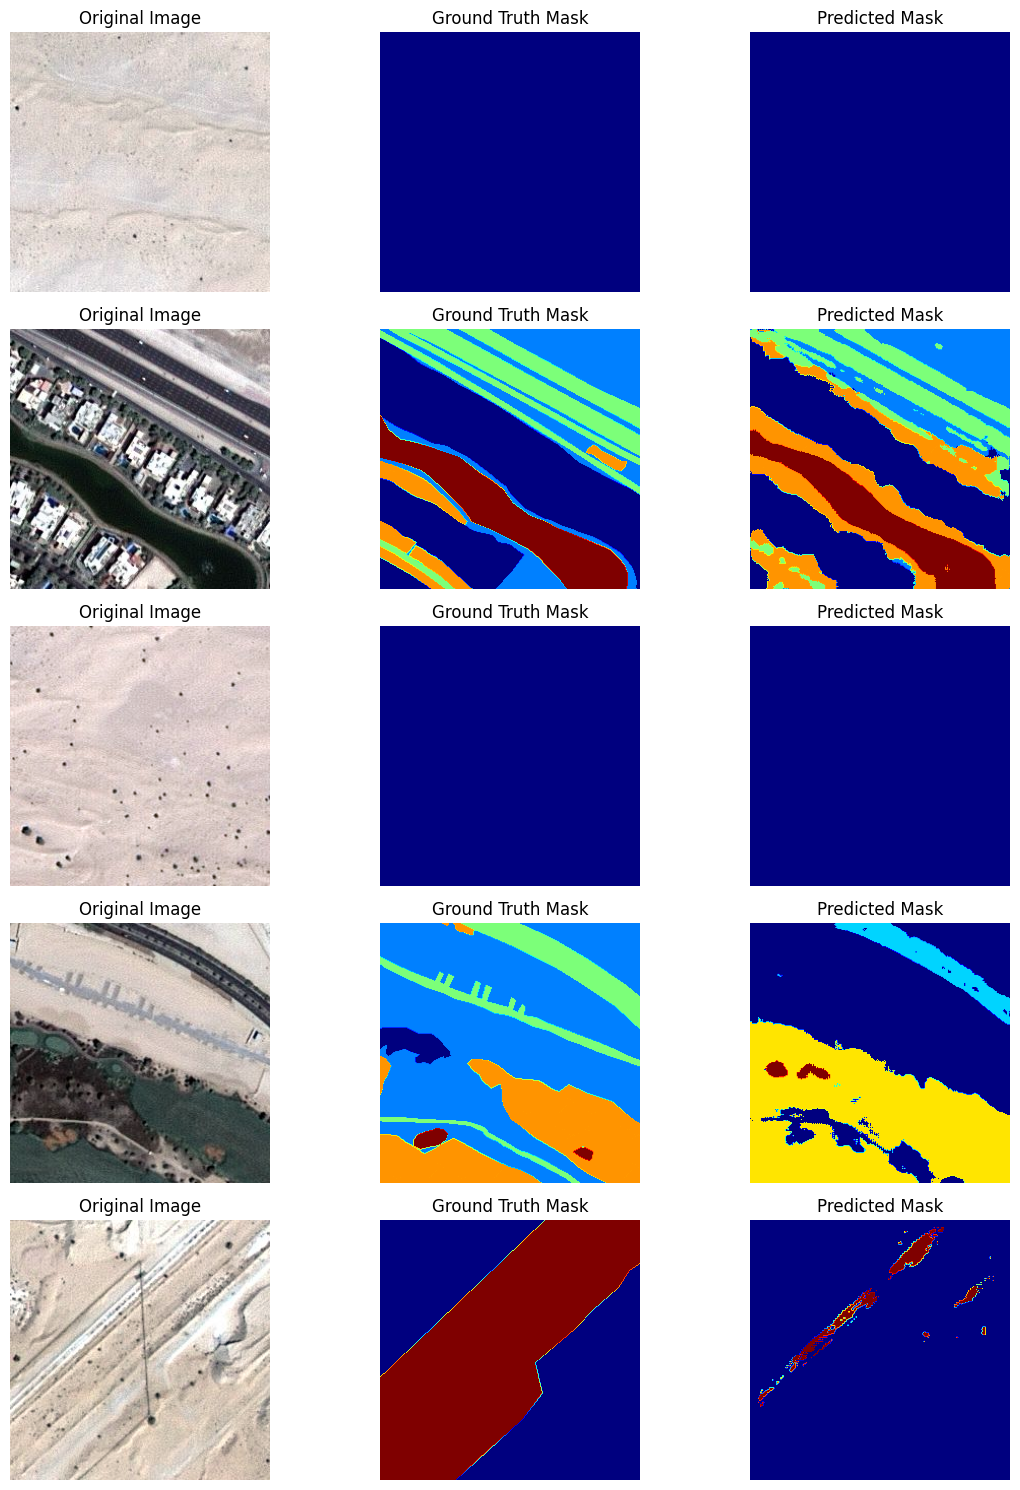

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to visualize predictions
def visualize_predictions(model, test_generator, num_samples=5):
    """
    Visualizes predictions of the model on test images.

    Parameters:
    - model: Trained U-Net model.
    - test_generator: Data generator for test images.
    - num_samples: Number of images to visualize.
    """
    # Get a batch from the test generator
    X_batch, y_batch = next(test_generator)

    # Predict the segmentation mask
    y_pred = model.predict(X_batch)

    # Convert one-hot encoded masks to class indices
    y_pred_labels = np.argmax(y_pred, axis=-1)
    y_true_labels = np.argmax(y_batch, axis=-1)

    # Plot images with ground truth and predictions
    fig, axes = plt.subplots(num_samples, 3, figsize=(12, num_samples * 3))

    for i in range(num_samples):
        axes[i, 0].imshow(X_batch[i])
        axes[i, 0].set_title("Original Image")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(y_true_labels[i], cmap="jet")
        axes[i, 1].set_title("Ground Truth Mask")
        axes[i, 1].axis("off")

        axes[i, 2].imshow(y_pred_labels[i], cmap="jet")
        axes[i, 2].set_title("Predicted Mask")
        axes[i, 2].axis("off")

    plt.tight_layout()
    plt.show()

# Visualize model predictions
visualize_predictions(model, test_generator)
